In [ ]:
using Pkg
Pkg.activate("../")
using Revise, EasyStream

In [2]:
@load KNNClassifier
@load DecisionTreeClassifier
path = "../datasets/sinthetic/"

n_avaiable_labels = 150
###Getting data
streams = Array{Any, 1}()
name_files = split(read(`ls $path`, String), "\n")[1:end-1];
for name_file in name_files
    dataset = load(path * name_file, header_exists=false) |> DataFrame
    dataset = coerce(dataset, autotype(dataset))
    samples = Matrix{Float64}(dataset[:,1:end-1])
    labels = categorical(dataset[:,end])
    push!(streams, EasyStream.Stream(n_avaiable_labels, samples, labels, name = name_file))
end

In [19]:
measures = EasyStream.evaluate(
streams[1], #Streams
[KNNClassifier(), KNNClassifier()], #Models
measures = [:time, :allocation]); #Measures

In [20]:
graphs = EasyStream.generate(measures, [:graph, :time])

1


1-element Array{Array{Any,1},1}:
 [Plot{Plots.GRBackend() n=1}]

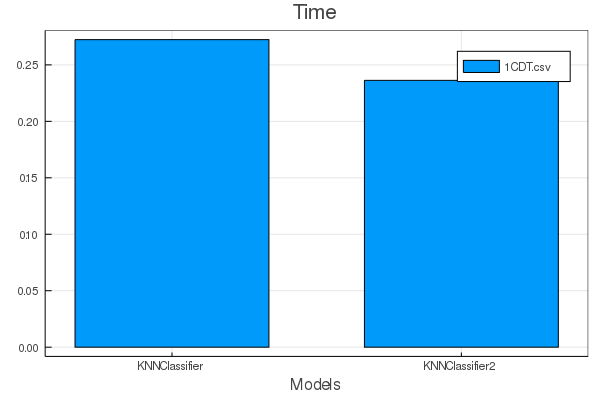

In [21]:
graphs[1][1]

In [23]:
graphs = EasyStream.generate(measures, [:graph, :allocation])

1


1-element Array{Array{Any,1},1}:
 [Plot{Plots.GRBackend() n=1}]

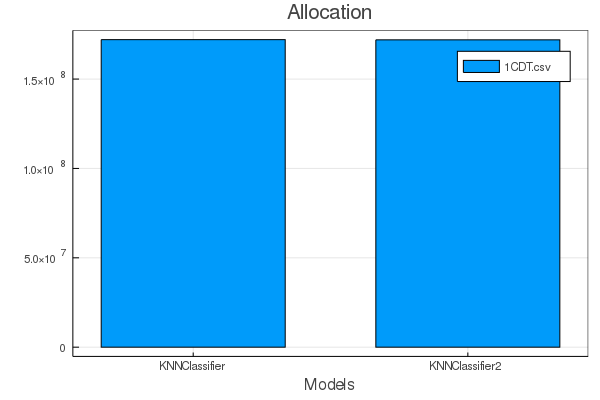

In [24]:
graphs[1][1]

In [17]:
graphs = EasyStream.generate(measures, [:graph, :accuracy])

Calculating new measures...
1


1-element Array{Array{Any,1},1}:
 [Plot{Plots.GRBackend() n=3}]

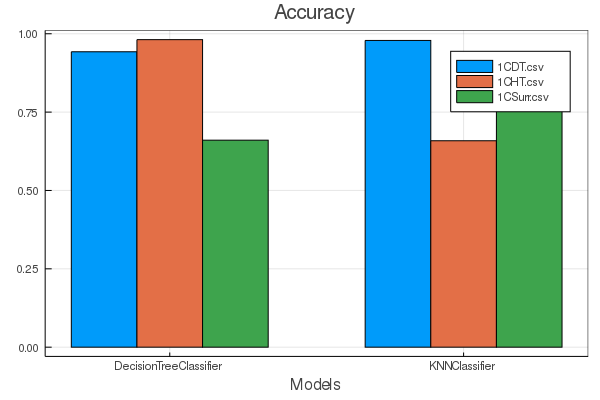

In [18]:
graphs[1][1]

In [ ]:
result2 = EasyStream.evaluate(
streams[1:3], #Streams
[KNNClassifier(), DecisionTreeClassifier()],
measures = [:time, :accuracy]); #Models

In [ ]:
EasyStream.generate(result2, [:table, :time])

Usando o `EasyStream.evaluate` geramos métricas para serem usadas em tabelas e gráficos para avaliar o desempenho dos modelos nos streams. A partir do uso do evaluate as metricas são geradas e, logo em seguida, podemos usar a função  `EasyStream.generate`para criar os respectivos elementos para analise.

EasyStream.evaluate
===
    function evaluate(streams, models; outputs = [[:bars, :time]], 
    header = nothing, format = nothing, steps::Int64 = 10)

* `output` parâmetro usado para que `EasyStream.evaluate` tenha como retorno um elemento para analisa, como na função `EasyStream.generate`.

* `header` é o parametro que define o nome dos modelos através de um vetor de strings, caso esse argumento não seja passado é usado o nome das structs como nome dos modelos.

* `format` muda a formatação da saída através de uma tupla com três elementos `:measure`, `:model` e `:stream` e a ordem destes elementos representão nas tabelas (linha, coluna, tabelas) de forma que `(:measure, :model,:stream)` haverá uma tabela pra cada stream e cada linha das tabelas conterá uma métrica para um model na coluna. 

EasyStream.generate
===
    function output_generate(outputs)
    
Está função tem um único parametro e espera um array de outputs, onde cada output é um array com a seguinte configuração: `[tipo_de_saida, métricas...]`, por exemplo, `[:table, :time]`, `[:table, :allocation, :time]`, `[:bars, :time, :accuracy]`.

EasyStream.setformat
===


Examples:
===

In [ ]:
EasyStream.evaluate(
streams[1:3], #Streams
[KNNClassifier(), DecisionTreeClassifier()],
measures = [:time, :accuracy]); #Models

Nesse caso a formatação padrão é `(:measure, :stream, :model)`, então cada gráfico representa a avaliação de um modelo em determindos streams definidos no parametro `streams` e usando as métricas passadas através da estruturas do `output`.

In [ ]:
result = EasyStream.generate([:bars, :time]);

In [ ]:
result[1][1]

In [ ]:
result = EasyStream.generate([:bars, :accuracy]);

In [ ]:
result[1][1]

In [ ]:
result[1][2]

Depois da mudança do formato cada grafico/tabela representa uma métrica e neles estão contidas as comparações entre o desempenho dos modelos nos streams.

In [ ]:
EasyStream.setformat((:stream, :model, :measure));

In [ ]:
result = EasyStream.generate([:table, :time]);

In [ ]:
result[1][1]

In [ ]:
result = EasyStream.generate([:bars, :time]);

In [ ]:
result[1][1]

In [ ]:
EasyStream.setformat((:stream, :measure, :model));

In [ ]:
result = EasyStream.generate([:bars, :time]);

In [ ]:
result[1][1]

In [ ]:
result[1][2]

In [ ]:
EasyStream.setformat((:model, :stream, :measure));

In [ ]:
result = EasyStream.generate([:bars, :time]);

In [ ]:
result[1][1]

In [ ]:
EasyStream.evaluate(
[streams[1], streams[2], streams[3]], #Streams
[KNNClassifier(), DecisionTreeClassifier()]);

In [ ]:
EasyStream.generate([:table, :time, :accuracy])

In [ ]:
using Plots

In [ ]:
x = [1 2; 3 4; 10 20; 30 40]

In [ ]:
plot(x)

In [ ]:
scatter()

In [ ]:
x = [1 2 3; 4 5 6; 3 2 2]

In [ ]:
permutedims(x)